# Fashion MNIST dataset

In [6]:
import tensorflow as tf
from tensorflow import keras

# helper libraries
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
print('Tensor Flow Version :',tf.__version__)

Tensor Flow Version : 1.10.0


In [7]:
fasion_mnist = keras.datasets.fashion_mnist 

In [9]:
(train_images, train_lebels),(test_images, test_labels) =fasion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [11]:
train_images.shape

(60000, 28, 28)

In [16]:
train_lebels.shape

(60000,)

In [17]:
test_images.shape

(10000, 28, 28)

## Pre-process data

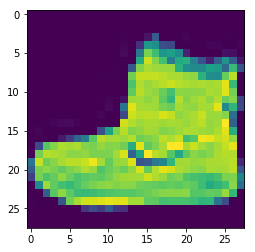

In [21]:
plt.imshow(train_images[0])
plt.show()

In [22]:
train_images = train_images/255
test_images = test_images/255

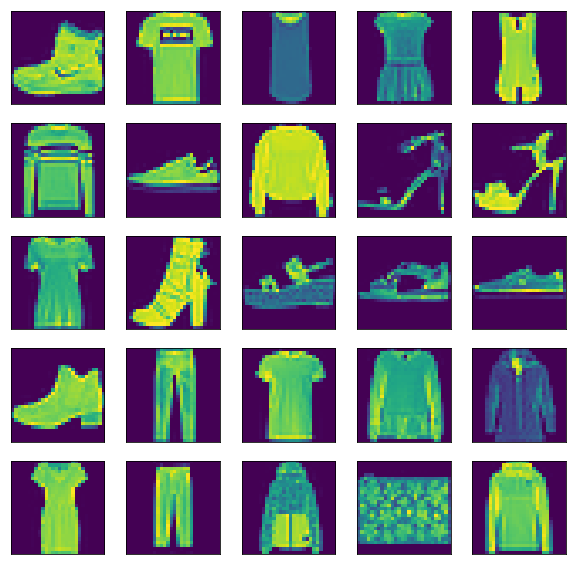

In [27]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])

plt.show()

## Build the Model

### Set up the layers

In [29]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(optimizer=tf.train.AdamOptimizer(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [36]:
model.fit(train_images, train_lebels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 2s 36us/step - loss: 0.4965 - acc: 0.8242
Epoch 2/5
60000/60000 [==============================] - 2s 32us/step - loss: 0.3779 - acc: 0.8633
Epoch 3/5
60000/60000 [==============================] - 2s 34us/step - loss: 0.3416 - acc: 0.8760
Epoch 4/5
60000/60000 [==============================] - 2s 34us/step - loss: 0.3163 - acc: 0.8841
Epoch 5/5
60000/60000 [==============================] - 2s 35us/step - loss: 0.2978 - acc: 0.8903


In [37]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 20us/step
Test accuracy: 0.8747


In [38]:
predictions = model.predict(test_images)

In [39]:
predictions[0]

array([3.0210367e-06, 1.4620515e-06, 5.8345072e-06, 1.6600837e-06,
       1.3388675e-06, 4.2611305e-02, 2.9189052e-06, 1.2362354e-01,
       2.3726427e-05, 8.3372515e-01], dtype=float32)

In [42]:
np.argmax(predictions[0])

9

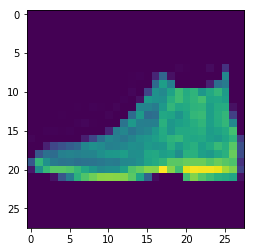

In [44]:
plt.imshow(test_images[0])
plt.show()